### https://www.kaggle.com/lesibius/selecting-stocks-from-predicted-p-e-ratio

#### df_pe['PE'] = df_pe['close'] / df_pe['Earnings Per Share']

In [1]:
import pandas as pd
import numpy as np
import json
import os
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
import pymysql

# https://www.itread01.com/content/1543496702.html 參考資料
# https://bigdatafinance.tw/index.php/tech/data-processing/500-python-mysql

def read_data(sql):
    host = '127.0.0.1'  #ip
    port = 3306  #埠號
    user = 'teb101Club'   #資料庫使用者名稱
    password = 'teb101Club'    #資料庫密碼
    db = 'twstock'    #資料庫名
    #charset = 'utf8mb4'  #編碼

    try:
        #db = pymysql.connect(host=host, port=port, user=user, password=password, db=db, charset=charset)  #開啟資料庫連線
        db = pymysql.connect(host=host, port=port, user=user, password=password, db=db)  #開啟資料庫連線
        cursor = db.cursor()  #建立遊標物件

        line = cursor.execute(sql)   #執行sql,返回行數
        data = cursor.fetchall()   #fetchall返回查詢的全部資料， 返回元組型別資料
        # data = cursor.fetchone()   #fetchone只獲取一條資料， 返回元組型別資料
        # print(line)
        return data
        # print(data)

    except Exception as msg:
        print(msg)
    finally:
        cursor.close()  #關掉遊標
        db.close()  #關掉資料庫連線


if __name__ == '__main__':
    
    EPS_industry_sql = "SELECT a.* , b.industry FROM twstock.profitloss as a, twstock.stock_info as b where a.sID = b.sID and code = '9850'"
    
    EPS_industry = read_data(EPS_industry_sql)   

(1049, "Unknown database 'twstock'")


UnboundLocalError: local variable 'cursor' referenced before assignment

In [ ]:
EPS_industry = pd.DataFrame(EPS_industry, columns = ['sID', 'season','code','EPS','industry'])
EPS_industry['industry'] = EPS_industry['industry'].apply(lambda x: x.strip())
EPS_industry

In [4]:
sns.set(color_codes=True)

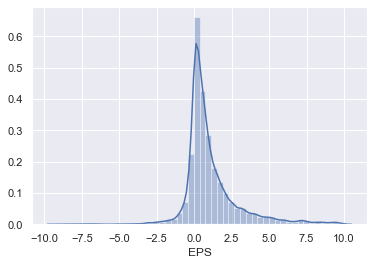

In [5]:
EPS_filter = EPS_industry[(EPS_industry['EPS'] < 10) & (EPS_industry['EPS'] > -10)]
sns.distplot(EPS_filter['EPS'])

In [ ]:
# PB ratio

In [20]:
# pivot table
EPS_pivot = EPS_industry.pivot(index = 'sID', columns = 'season', values = 'EPS')
EPS_pivot = EPS_pivot.fillna(0)
# EPS_pivot.info()

# filter out the 3 stock which EPS is less than 0 for last 3 season
bomb = EPS_pivot[(EPS_pivot['2020_Q1'] < 0) & (EPS_pivot['2019_Q4'] < 0) & (EPS_pivot['2019_Q3'] < 0)]
bomb_sID = bomb.index.tolist()

# if EPS_pivot['2020_Q1'] < 0: 
#     if EPS_pivot['2019_Q4'] < 0:
#         if EPS_pivot['2019_Q3'] < 0:
#             print(EPS_pivot['sID'])
#             bomb_sid.append(EPS_pivot['sID'])

In [51]:
bomb_tag = {}
for i in EPS_pivot.index:
    if i in bomb_sID:
       bomb_tag[i] = 1
    else:
        bomb_tag[i] = 0
bomb_tag.items()
        
bomb_tag = pd.DataFrame(list(bomb_tag.items()),columns = ['sID','bomb_stock'])
bomb_tag['sID'] = bomb_tag['sID'].astype('int64')
bomb_tag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sID         854 non-null    int64
 1   bomb_stock  854 non-null    int64
dtypes: int64(2)
memory usage: 13.5 KB


In [61]:
finance_index = pd.read_csv('finance_index.csv', index_col = 'Unnamed: 0')

In [62]:
finance_index

,sID,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,C5,C6,C7,C8,D1,D2,D3,D4,D5,avg
0,1101,0.0,5.12,9.15,3.83,14.20,17.59,1.14,88.17,15.41,...,0.00,0.00,0.00,0.00,3.56,9.77,7.13,994.70,0.02,34.116129
1,1101,0.0,1.64,2.81,1.06,19.23,25.29,0.21,48.01,13.40,...,0.21,0.03,0.06,0.17,12.34,14.16,139.53,5423.54,0.09,37.225862
2,1101,0.0,2.90,5.40,2.70,26.95,38.95,0.93,119.02,39.90,...,0.24,0.04,0.08,0.23,14.34,34.83,121.12,59.56,0.18,41.111250
3,1101,0.0,2.38,3.96,2.24,22.85,31.19,1.25,197.25,57.07,...,0.22,0.04,0.07,0.23,21.37,39.46,126.34,-66.14,0.14,41.535156
4,1101,0.0,8.19,14.28,7.34,22.62,30.97,1.80,78.60,21.27,...,0.79,0.15,0.26,0.90,29.30,26.73,101.83,-2.92,0.26,36.122308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9684,9958,0.0,0.32,0.66,0.08,8.12,9.67,1.12,1158.05,98.33,...,0.06,0.02,0.03,0.08,78.45,-2.90,25.10,164.05,0.60,65.735185
9685,9958,0.0,0.21,0.44,0.01,4.73,5.45,1.53,2448.80,128.59,...,0.07,0.02,0.03,0.08,82.15,13.54,-28.92,346.87,0.54,66.465574
9686,9958,0.0,-0.85,-1.55,5.91,-15.05,-15.66,0.24,-106.34,35.97,...,0.08,0.03,0.04,0.11,40.43,32.61,-537.26,-1464.59,0.08,73.766667
9687,9958,0.0,1.03,2.06,6.44,4.82,5.70,-0.29,-108.09,0.64,...,0.33,0.11,0.15,0.44,15.20,45.18,80.02,-1887.40,0.10,70.918605


In [63]:
finance_index_2020Q1 = finance_index[finance_index['season'] == '2020_Q1']
finance_index_2020Q1 = pd.merge(finance_index_2020Q1, bomb_tag,how='left',on = 'sID')
finance_index_2020Q1

,sID,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,C6,C7,C8,D1,D2,D3,D4,D5,avg,bomb_stock
0,1101,0.00,1.24,2.15,0.96,20.30,27.54,0.52,170.59,44.07,...,0.02,0.04,0.16,-1.34,-13.33,-11.38,-108.76,-0.02,41.816964,0.0
1,1102,0.00,0.67,1.22,0.38,15.39,19.36,0.18,103.61,33.70,...,0.02,0.03,0.17,-0.08,-32.22,-46.49,-151.79,0.06,44.386607,0.0
2,1103,0.00,-0.43,-0.72,-0.60,-32.08,-30.87,0.01,-9.16,11.82,...,0.00,0.01,0.06,1.45,9.50,183.93,-197.75,0.08,19.139286,0.0
3,1104,0.00,0.30,0.38,0.21,5.38,6.21,-0.03,-41.89,-2.28,...,0.02,0.04,0.14,-3.09,5.60,566.06,-205.50,-0.01,17.531250,0.0
4,1108,0.00,1.47,2.54,1.25,9.97,11.95,0.30,80.99,8.85,...,0.12,0.10,0.43,3.09,32.41,-517.78,-734.99,0.00,7.420357,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,9944,0.00,0.85,1.47,0.80,6.90,9.85,0.43,211.57,15.35,...,0.06,0.08,0.19,-4.31,-23.90,8.93,-71.58,-0.06,19.482143,0.0
901,9945,0.00,0.26,0.52,2.39,8.90,11.04,0.01,18.70,7.59,...,0.01,0.02,0.58,9.92,8.67,-11.31,-177.74,0.09,40.696429,0.0
902,9946,0.00,1.26,2.15,1.23,26.42,41.02,0.77,243.71,70.20,...,0.27,0.03,4.69,19.50,-62.80,-72.49,-75.15,0.00,20.962143,0.0
903,9955,-14.35,-1.84,-3.33,-1.61,-14.35,-13.26,-0.12,26.01,-2.75,...,0.05,0.09,0.13,-3.18,-12.33,-1323.67,-672.89,-0.02,17.671429,0.0


In [60]:
finance_index_2020Q1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 854 entries, 0 to 853
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sID         854 non-null    int64  
 1   A1          851 non-null    float64
 2   A2          851 non-null    float64
 3   A3          851 non-null    float64
 4   A4          851 non-null    float64
 5   A5          851 non-null    float64
 6   A6          851 non-null    float64
 7   A7          851 non-null    float64
 8   A8          851 non-null    float64
 9   A9          851 non-null    float64
 10  season      851 non-null    object 
 11  industry    851 non-null    object 
 12  B1          851 non-null    float64
 13  B2          851 non-null    float64
 14  B3          851 non-null    float64
 15  B4          851 non-null    float64
 16  B5          851 non-null    float64
 17  B6          851 non-null    float64
 18  B7          851 non-null    float64
 19  B8          851 non-null    f

# SVM model
#### https://medium.com/programming-with-data/udemy-%E8%AA%B2%E7%A8%8B%E7%AD%86%E8%A8%98-support-vector-machines-in-python-creating-support-vector-machine-model-in-python-1f465e0b248e

#### 獲益貶損貼標 https://www.finlab.tw/generate-labels-stop-loss-stop-profit/

In [65]:

X = finance_index_2020Q1.drop(['season','sID','industry','bomb_stock'],axis = 1)